<a href="https://colab.research.google.com/github/emmad225/BIACoursework/blob/main/duffyep_pset1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [CSCI 3397/PSYC 3317] Pset 1: 2D Convolution

**Posted:** Friday, January 29, 2024

**Due:** Monday, February 12, 2024

__Total Points__: 22 pts

__Submission__: please rename the .ipynb file as __\<your_username\>_pset1.ipynb__ before you submit it to canvas. Example: weidf_pset1.ipynb.

# Task description

As a fun exercise, we will code up the 2D convolution function from scratch! It's totally fine if you look up online materials/tutorials and learn from them.

<b>Hint: For the code block for you to fill in, `-1` is the placeholder for you to change</b>

In [ ]:
! wget https://bc-cv.github.io/csci3397/public/dip_patch/zebra.png
! wget https://bc-cv.github.io/csci3397/public/dip_patch/grace_hopper.png

--2024-02-12 21:06:20--  https://bc-cv.github.io/csci3397/public/dip_patch/zebra.png
Resolving bc-cv.github.io (bc-cv.github.io)... 185.199.108.153, 185.199.109.153, 185.199.111.153, ...
Connecting to bc-cv.github.io (bc-cv.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49261 (48K) [image/png]
Saving to: ‘zebra.png.3’

zebra.png.3         100%[===================>]  48.11K  --.-KB/s    in 0.01s   

2024-02-12 21:06:20 (4.51 MB/s) - ‘zebra.png.3’ saved [49261/49261]

--2024-02-12 21:06:21--  https://bc-cv.github.io/csci3397/public/dip_patch/grace_hopper.png
Resolving bc-cv.github.io (bc-cv.github.io)... 185.199.108.153, 185.199.109.153, 185.199.111.153, ...
Connecting to bc-cv.github.io (bc-cv.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30421 (30K) [image/png]
Saving to: ‘grace_hopper.png.3’

grace_hopper.png.3  100%[===================>]  29.71K  --.-KB/s    in 0.003s  

2024-

# <b> 1. [4 pts] 2D Filter kernel</b>

Let's write a function to generate 2D filter kernel matrix. [[Gaussian function]](https://en.wikipedia.org/wiki/Gaussian_function)

- [1 pt] Impulse kernel
- [1 pt] Box kernel
- [2 pts] Gaussian kernel. use `np.meshgrid` to generate the matrix of `x` and `y`.

Hints:
- make sure the sum of the kernel is 1
- `kernel_size` is the size of the whole patch


(Lec 6)

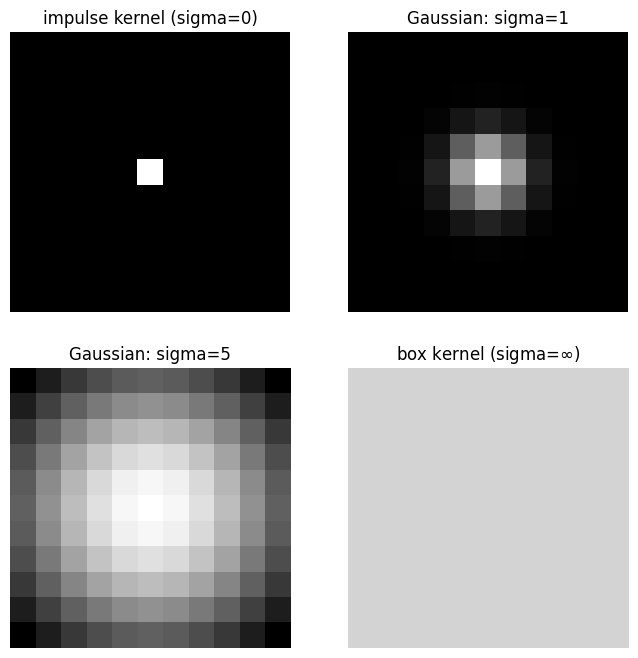

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def getKernel(kernel_size, kernel_type='box', sigma = 1):
  # assume kernel_size is a scalar for both height and width
  if not np.isscalar(kernel_size):
      kernel_size = kernel_size[0]

  #### Your code starts here
  if kernel_type == 'impulse':
    # [1 pt]
      kernel = np.zeros((kernel_size, kernel_size))
      kernel[kernel_size // 2, kernel_size // 2] = 1
  elif kernel_type == 'box':
    # [1 pt]
        kernel = np.ones((kernel_size, kernel_size)) / (kernel_size * kernel_size)
  elif kernel_type == 'gaussian':
    # [2 pts] use the input sigma
      arr = np.linspace(-(kernel_size - 1) / 2, (kernel_size - 1) / 2, kernel_size)
      #x and y matrix using meshgrid
      x, y = np.meshgrid(arr, arr)
      #gaussian filter formula
      kernel = np.exp(-(x ** 2 + y ** 2) / (2. * sigma ** 2))
      kernel = kernel / np.sum(kernel)
  else:
    raise NotImplementedError
  #### Your code ends here

  return kernel

##### unit test #####
kernel_size = 11

plt.figure(figsize=(8, 8))
# Impulse kernel can be seen as Gaussian kernel with sigma=0
impulse_kernel = getKernel(kernel_size, 'impulse')
plt.subplot(221)
plt.imshow(impulse_kernel, cmap='gray', vmin=0, vmax=1)
plt.title('impulse kernel (sigma=0)')
plt.axis('off')

# Gaussian kernels
sigmas = [1,5]
for i in range(len(sigmas)):
  sigma = sigmas[i]
  gaussian_kernel = getKernel(kernel_size, 'gaussian', sigma)
  plt.subplot(2,2,i+2)
  plt.imshow(gaussian_kernel, cmap='gray')
  plt.title('Gaussian: sigma=%d' % sigma)
  plt.axis('off')

# Box kernel can be seen as Gaussian kernel with sigma=\infty
box_kernel = getKernel(kernel_size, 'box')
plt.subplot(224)
plt.imshow(box_kernel, cmap='gray', vmin=0, vmax=0.01)
plt.title('box kernel (sigma=$\infty$)')
plt.axis('off')

plt.show()

# <b>2. [11 pts] Image padding</b>

## 2.1 [3 pts] Padding size
Please read the material <a href="https://towardsdatascience.com/the-most-intuitive-and-easiest-guide-for-convolutional-neural-network-3607be47480">here</a> (section "Convolution with padding and stride")

<img src="https://miro.medium.com/max/1400/1*Tq_lyA2uRy4BTBpYlbKTTQ.gif">

Here are three common options of padding based on the desired output size of the image.
(Forget about the second column)

- (1) "valid" filtering: no pad
  
- (3) "same" filtering: pad `(pad_size-1)/2`)
  
- (4) "full" filtering: pad `pad_size-1`
  
(lec. 5)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def getPadSize(kernel_size, pad_type='same'):
  # return pad size for one side (e.g., left)

  #### Your code starts here
  if pad_type == 'valid':
    pad_size = 0
  elif pad_type == 'same':
    pad_size = (kernel_size - 1) / 2
  elif pad_type == 'full':
    pad_size = kernel_size - 1
  else:
      raise NotImplementedError
  #### Your code ends here

  return pad_size


##### unit test #####
kernel_size = 11
input_size = 200

opts = ['valid', 'same', 'full']
for opt in opts:
  print('pad size on one side for "%s" is: %d' % (opt, getPadSize(kernel_size, opt)))

pad size on one side for "valid" is: 0
pad size on one side for "same" is: 5
pad size on one side for "full" is: 10


## 2.2 [8 pts] Padding value
(lec. 5)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread

def imagePad(im, pad_size=0, border_type='zero'):
    # only for gray image
    # assume pad_size is a scalar for both height and width
    if not np.isscalar(pad_size):
        pad_size = pad_size[0]

    #### Your code starts here
    height = im.shape[0]
    width = im.shape[1]

    # [1 pt] create an all-zero image im_pad with the padded size
    im_pad = np.zeros((height + 2 * pad_size, width + 2 * pad_size))

    # [1 pt] put im in the center of im_pad
    center_row = (im_pad.shape[0] - im.shape[0]) // 2
    center_col = (im_pad.shape[1] - im.shape[1]) // 2
    im_pad[center_row:center_row+im.shape[0], center_col:center_col+im.shape[1]] = im

#top/bottom/left/right
    if border_type == 'zero':
        pass
    elif border_type == 'circular':
      # [2 pts] do left/right/top/bottom separately
      #recieved help here from someone else also stuck on the image transformation occuring from circular padding
        im_pad[:pad_size, pad_size:-pad_size] = im_pad[-(pad_size+pad_size):-pad_size,pad_size:-pad_size]
        im_pad[-pad_size:, pad_size:-pad_size] = im_pad[pad_size:pad_size+pad_size,pad_size:-pad_size]
        im_pad[:, :pad_size] = im_pad[:,-pad_size-pad_size:-pad_size]
        im_pad[:, -pad_size:] = im_pad[:,pad_size:pad_size+pad_size]
    elif border_type == 'mirror':
        # [2 pts] do left/right/top/bottom separately
        im_pad[:pad_size, pad_size:-pad_size] = np.flipud(im_pad[pad_size:2*pad_size, pad_size:-pad_size])
        im_pad[-pad_size:, pad_size:-pad_size] = np.flipud(im_pad[-2*pad_size:-pad_size, pad_size:-pad_size])
        im_pad[:, :pad_size] = np.fliplr(im_pad[:, pad_size:2*pad_size])
        im_pad[:, -pad_size:] = np.fliplr(im_pad[:, -2*pad_size:-pad_size])
    elif border_type == 'repeat':
        # [2 pts] do left/right/top/bottom separately
        im_pad[:pad_size, pad_size:-pad_size] = np.tile(im_pad[pad_size:pad_size+1, pad_size:-pad_size], (pad_size, 1))
        im_pad[-pad_size:, pad_size:-pad_size] = np.tile(im_pad[-(pad_size+1):-pad_size, pad_size:-pad_size], (pad_size, 1))
        im_pad[:, :pad_size] = np.tile(im_pad[:, pad_size:pad_size+1], (1, pad_size))
        im_pad[:, -pad_size:] = np.tile(im_pad[:, -(pad_size+1):-pad_size], (1, pad_size))

    #### Your code ends here

    return im_pad

## unit test with toys
border_types = ['zero', 'circular', 'mirror', 'repeat']

im = np.arange(16).reshape([4,4])
pad_size = 2
for border_type in border_types:
    print(border_type)
    print(imagePad(im, pad_size, border_type))
    print('-------------')


zero
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  2.  3.  0.  0.]
 [ 0.  0.  4.  5.  6.  7.  0.  0.]
 [ 0.  0.  8.  9. 10. 11.  0.  0.]
 [ 0.  0. 12. 13. 14. 15.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]
-------------
circular
[[10. 11.  8.  9. 10. 11.  8.  9.]
 [14. 15. 12. 13. 14. 15. 12. 13.]
 [ 2.  3.  0.  1.  2.  3.  0.  1.]
 [ 6.  7.  4.  5.  6.  7.  4.  5.]
 [10. 11.  8.  9. 10. 11.  8.  9.]
 [14. 15. 12. 13. 14. 15. 12. 13.]
 [ 2.  3.  0.  1.  2.  3.  0.  1.]
 [ 6.  7.  4.  5.  6.  7.  4.  5.]]
-------------
mirror
[[ 5.  4.  4.  5.  6.  7.  7.  6.]
 [ 1.  0.  0.  1.  2.  3.  3.  2.]
 [ 1.  0.  0.  1.  2.  3.  3.  2.]
 [ 5.  4.  4.  5.  6.  7.  7.  6.]
 [ 9.  8.  8.  9. 10. 11. 11. 10.]
 [13. 12. 12. 13. 14. 15. 15. 14.]
 [13. 12. 12. 13. 14. 15. 15. 14.]
 [ 9.  8.  8.  9. 10. 11. 11. 10.]]
-------------
repeat
[[ 0.  0.  0.  1.  2.  3.  3.  3.]
 [ 0.  0.  0.  1.  2.  3.  3.  3.]
 [ 0.  0.  0.  1.

<ipython-input-60-f042f8398376>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  I = imread('zebra.png')


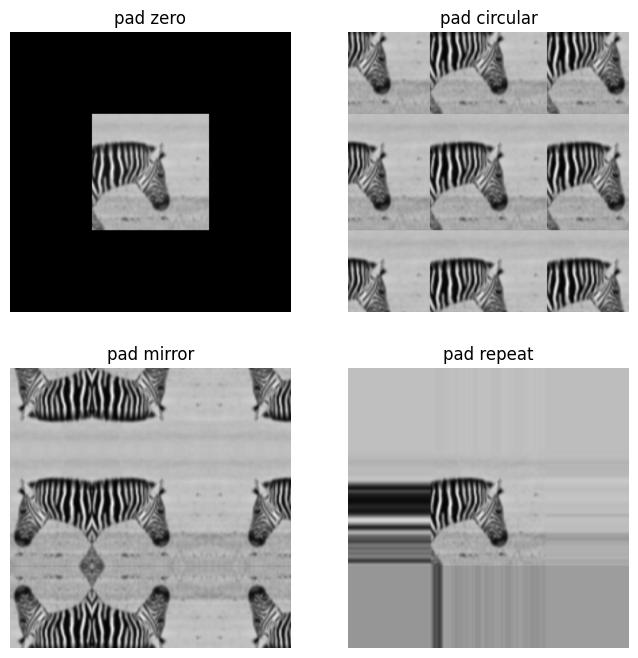

In [ ]:
## unit test to match the image in the slide
I = imread('zebra.png')
pad_size = 301

plt.figure(figsize=(8, 8))
border_types = ['zero', 'circular', 'mirror', 'repeat']
for i, border_type in enumerate(border_types):
  plt.subplot(2,2,i+1)
  plt.imshow(imagePad(I, pad_size, border_type), cmap='gray')
  plt.title('pad %s'%border_type)
  plt.axis('off')

plt.show()

# <b>3. [7 pts] Convolution: Image * Kernel</b>

(Lec 6)

<ipython-input-61-9c706274c655>:34: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  I = imread('zebra.png')


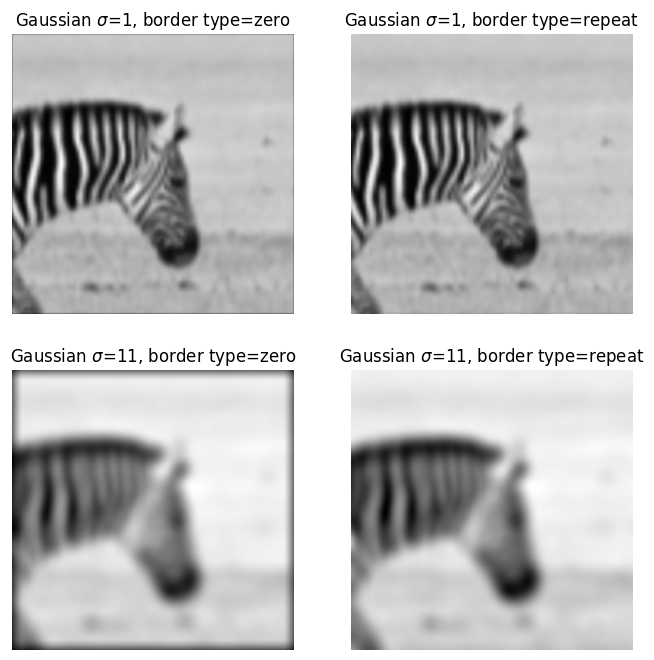

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread

def convFilter(im, kernel, pad_type='same', border_type='zero'):

  height = im.shape[0]
  width = im.shape[1]

  kern_height=kernel.shape[0]
  kern_width = kernel.shape[1]
  # 1. [2 pts] pad the input image
  im_pad = imagePad(im, kernel.shape[0] // 2, border_type)

  # 2. [1 pt] create the output image
  im_out = np.zeros_like(im)
  # forget about the patch center
  # just slide through all patches and record the output in im_out

  # 3. [4 pts] filtering
  # [1 pt] flip the kernel in both up-down/left-right
  kernel_flip = np.flip(np.flip(kernel, axis=0), axis=1)
  # [1 pt] double for-loop over all output pixels
  for y in range(height):
    for x in range(width):
      # [1 pt] get each image patch
      im_patch = im_pad[y:y+kern_height, x:x+kern_width]
      # [1 pt] apply the dot product with the flipped kernel
      im_out[y, x] = np.sum(im_patch * kernel_flip)
  return im_out

## unit test to match the image in the slide

I = imread('zebra.png')
kernel_size = 31
plt.figure(figsize=(8, 8))

pid = 1
for sigma in [1,11]:
  gaussian_kernel = getKernel(kernel_size, 'gaussian', sigma)
  for border_type in ['zero', 'repeat']:
    # use 'same' pad type
    im_out = convFilter(I, gaussian_kernel, border_type=border_type)
    plt.subplot(2,2,pid)
    plt.imshow(im_out, cmap='gray')
    plt.title('Gaussian $\sigma$=%d, border type=%s' % (sigma, border_type))
    plt.axis('off')
    pid+=1

plt.show()

# <b>4. [0 pts] OpenCV package</b>
As you now have the hand-on knowledge of convolution, we will directly use OpenCV functions to implement filtering. From now on, you can focus on learning how to use these filters to solve real-world problems.

Syntax:
- Generic filter: `cv2.filter2D(image, -1, kernel matrix)`
- Gaussian: `cv2.GaussianBlur(image, kernel_size, sigma_x, sigma_y)` (if sigma_x=0, it'll be automatically estimated)

[[Tutorial]](https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html)

<ipython-input-62-11a229b9d9c2>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  I = imread('grace_hopper.png')


(-0.5, 212.5, 212.5, -0.5)

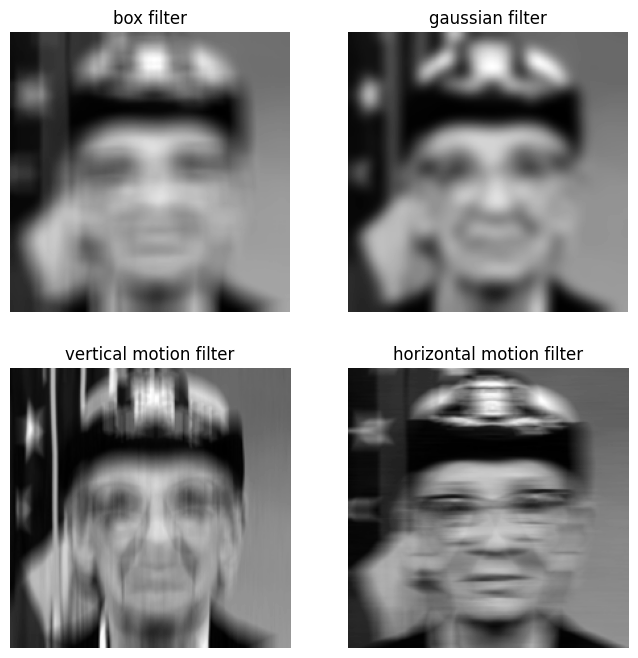

In [ ]:
import cv2
I = imread('grace_hopper.png')
kernel_size = 21
sigma = 5


# Box filter
# note the grid ghosting artifacts
I_box = cv2.filter2D(I, -1, getKernel(kernel_size))

# Gaussian filter
I_gauss = cv2.GaussianBlur(I, (kernel_size,kernel_size), sigma)

# motion blur filter
# 1D version of box filter, as if the object moves really fast in one direction
I_hblur = cv2.filter2D(I, -1, np.ones([1,kernel_size])/kernel_size)
I_vblur = cv2.filter2D(I, -1, np.ones([kernel_size,1])/kernel_size)


plt.figure(figsize=(8, 8))
plt.subplot(221);plt.imshow(I_box, cmap='gray');plt.title('box filter');plt.axis('off')
plt.subplot(222);plt.imshow(I_gauss, cmap='gray');plt.title('gaussian filter');plt.axis('off')
plt.subplot(223);plt.imshow(I_vblur, cmap='gray');plt.title('vertical motion filter');plt.axis('off')
plt.subplot(224);plt.imshow(I_hblur, cmap='gray');plt.title('horizontal motion filter');plt.axis('off')